# k-nn : K-Nearest Neighbors

## Exercice 1

In [30]:
import numpy as np
import pandas as pa

import warnings
warnings.filterwarnings("ignore")

In [31]:
V1 = np.array([1, 2, 3])
V2 = np.array([4, 5, 6])

In [32]:
def euclidean(u, v): # euclidian distance
  return np.linalg.norm(u - v)

euclidean(V1, V2)

5.196152422706632

In [33]:
from scipy.spatial import distance
dst = distance.euclidean(V1, V2)
dst

5.196152422706632

In [34]:
u = np.array([1, 2, 3])
v = np.array([1, 2, 3, 1])
w = np.array([2, 3, 4, 0])
print(euclidean(u, v[:-1]))
print(euclidean(u, w[:-1]))

0.0
1.7320508075688772


In [35]:
def distances(u, dataset):
  res = []
  for v in dataset:
    res.append(euclidean(u, v[:-1]))
  return res

In [36]:
u = np.array([1, 2, 3])
dataset = np.array([[1, 2, 3, 0],
                   [2, 3, 4, 1],
                   [3, 4, 5, 1],
                   [4, 5, 6, 0]])
dist = distances(u, dataset)
print(dist)

[0.0, 1.7320508075688772, 3.4641016151377544, 5.196152422706632]


In [37]:
def voisins(u, dataset, k):
    res = []
    dist = distances(u, dataset)
    ind = np.argpartition(dist, k)[:k]
    for i in ind:
        res.append(dataset[i])
    return res

In [38]:
u = np.array([1, 2, 3])
dataset = np.array([[1, 2, 3, 1],
                   [2, 3, 4, 1],
                   [3, 4, 5, 0],
                   [4, 5, 6, 0]])
print(voisins(u, dataset, 2))

[array([1, 2, 3, 1]), array([2, 3, 4, 1])]


In [39]:
# from collections import Counter
def classifier(u, dataset, k):
  nb = voisins(u, dataset, k)
  classes = np.array(nb)[:, -1].astype(int)

  counts = np.bincount(classes) # count number of occurrence
  return np.argmax(counts) # max index

In [40]:
u = np.array([4, 5, 6])
dataset = np.array([[1, 2, 3, 0],
                   [2, 3, 4, 1],
                   [3, 4, 5, 0],
                   [4, 5, 6, 1],
                   [1, 2, 3, 0]])
print(distances(u, dataset))
print(classifier(u, dataset, 2))

[5.196152422706632, 3.4641016151377544, 1.7320508075688772, 0.0, 5.196152422706632]
0


## Exercice 2

In [41]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [42]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [43]:
print(iris.data.shape)

(150, 4)


In [44]:
print(iris.target.shape)

(150,)


In [45]:
for i in range(iris.target.size):
  if iris.target[i] == 2:
    iris.target[i] = 1
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [46]:
dataset = iris.data[:, 0::2]
iris.target = iris.target.reshape((iris.target.size, 1))

dataset = np.concatenate((dataset, iris.target), axis=1)
print(dataset)

[[5.1 1.4 0. ]
 [4.9 1.4 0. ]
 [4.7 1.3 0. ]
 [4.6 1.5 0. ]
 [5.  1.4 0. ]
 [5.4 1.7 0. ]
 [4.6 1.4 0. ]
 [5.  1.5 0. ]
 [4.4 1.4 0. ]
 [4.9 1.5 0. ]
 [5.4 1.5 0. ]
 [4.8 1.6 0. ]
 [4.8 1.4 0. ]
 [4.3 1.1 0. ]
 [5.8 1.2 0. ]
 [5.7 1.5 0. ]
 [5.4 1.3 0. ]
 [5.1 1.4 0. ]
 [5.7 1.7 0. ]
 [5.1 1.5 0. ]
 [5.4 1.7 0. ]
 [5.1 1.5 0. ]
 [4.6 1.  0. ]
 [5.1 1.7 0. ]
 [4.8 1.9 0. ]
 [5.  1.6 0. ]
 [5.  1.6 0. ]
 [5.2 1.5 0. ]
 [5.2 1.4 0. ]
 [4.7 1.6 0. ]
 [4.8 1.6 0. ]
 [5.4 1.5 0. ]
 [5.2 1.5 0. ]
 [5.5 1.4 0. ]
 [4.9 1.5 0. ]
 [5.  1.2 0. ]
 [5.5 1.3 0. ]
 [4.9 1.4 0. ]
 [4.4 1.3 0. ]
 [5.1 1.5 0. ]
 [5.  1.3 0. ]
 [4.5 1.3 0. ]
 [4.4 1.3 0. ]
 [5.  1.6 0. ]
 [5.1 1.9 0. ]
 [4.8 1.4 0. ]
 [5.1 1.6 0. ]
 [4.6 1.4 0. ]
 [5.3 1.5 0. ]
 [5.  1.4 0. ]
 [7.  4.7 1. ]
 [6.4 4.5 1. ]
 [6.9 4.9 1. ]
 [5.5 4.  1. ]
 [6.5 4.6 1. ]
 [5.7 4.5 1. ]
 [6.3 4.7 1. ]
 [4.9 3.3 1. ]
 [6.6 4.6 1. ]
 [5.2 3.9 1. ]
 [5.  3.5 1. ]
 [5.9 4.2 1. ]
 [6.  4.  1. ]
 [6.1 4.7 1. ]
 [5.6 3.6 1. ]
 [6.7 4.4 1. ]
 [5.6 4.5 

In [47]:
u = np.array([6.5, 2.5])
print(classifier(u, dataset, 3))

0


[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
 5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5. ]
[1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 1.5 1.6 1.4 1.1 1.2 1.5 1.3 1.4
 1.7 1.5 1.7 1.5 1.  1.7 1.9 1.6 1.6 1.5 1.4 1.6 1.6 1.5 1.5 1.4 1.5 1.2
 1.3 1.4 1.3 1.5 1.3 1.3 1.3 1.6 1.9 1.4 1.6 1.4 1.5 1.4]


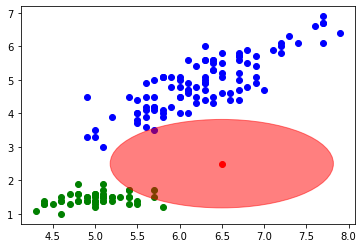

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt

X = dataset[dataset[:, 2] == 0.][:, 0]
Y = dataset[dataset[:, 2] == 0.][:, 1]
print(X)
print(Y)
plt.scatter(X, Y, c='g')

X = dataset[dataset[:, 2] == 1.][:, 0]
Y = dataset[dataset[:, 2] == 1.][:, 1]
plt.scatter(X, Y, c='b')
plt.plot(u[0], u[1], 'ro')

c = plt.Circle(u, 1.32, color='r', alpha=0.5)
ax = plt.gca()
ax.add_patch(c)
plt.show()


## Exercice 3

In [49]:
import pandas as pa

dataset = pa.read_csv("https://www.labri.fr/~zemmari/datasets/fruits.csv", sep="\t")
df = pa.DataFrame(dataset)
df[:4]

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80


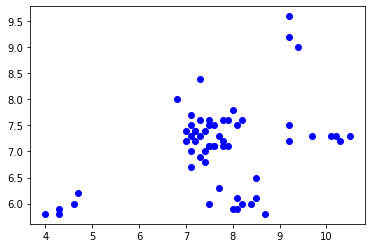

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
X = df["height"]
Y = df["width"]
plt.scatter(X, Y, c='b')

In [51]:
fName = df["fruit_name"].drop_duplicates()
fName


0        apple
3     mandarin
24      orange
43       lemon
Name: fruit_name, dtype: object

In [62]:
def getFruitColor(name):
  colors = ['b','g','r','c','m','y','orange','yellow','pink']
  i = np.where(fName == name)[0]
  if i >= len(colors):
    return "purple"
  return colors[int(i)]

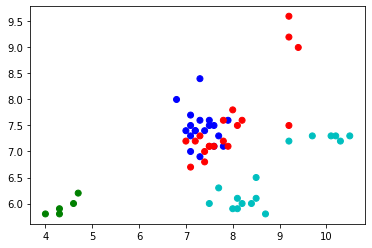

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
X = df["height"]
Y = df["width"]
y_colors = [getFruitColor(i) for i in df["fruit_name"]]
plt.scatter(X, Y, c=y_colors)

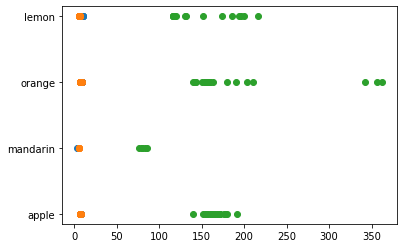

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt

Xh = df["height"]
Xw = df["width"]
Xm = df["mass"]

# X = df[["height", "width", "mass"]] #TODO: fix

Y = df["fruit_name"]

plt.scatter(Xh , Y)
plt.scatter(Xw , Y)
plt.scatter(Xm , Y)

?????

In [74]:
from sklearn.model_selection import train_test_split
X = df[["mass"]]
# X = df[["height", "width", "mass"]] #TODO: fix
Y = df["fruit_name"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

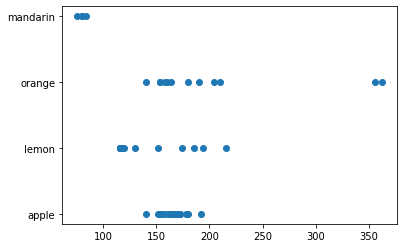

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X_train , y_train)